# Kaggle test set prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import lightgbm as lgb

In [4]:
# Load kaggle test set and saved final model
test_df = pd.read_parquet('../data/retrain/final_k_test.parquet')
model = lgb.Booster(model_file='final_model.txt')

In [5]:
test_df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont11_cap,log_cont12,cont12_rank,cont12_cap,log_cont13,cont13_rank,cont13_cap,log_cont14,cont14_rank,cont14_cap
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.377724,0.314707,0.300613,0.369858,0.533009,0.626062,0.704052,0.331145,0.415971,0.392562
1,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.689039,0.516266,0.539877,0.675759,0.373952,0.413598,0.453468,0.189003,0.047043,0.208045
2,9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.245410,0.216462,0.177914,0.241676,0.229989,0.232295,0.258586,0.260233,0.230875,0.297232
3,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.348867,0.294066,0.276074,0.341872,0.465157,0.524079,0.592264,0.442090,0.590185,0.555955
4,15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.359572,0.301771,0.285276,0.352251,0.263544,0.277620,0.301535,0.602031,0.952352,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.550529,0.430790,0.435583,0.538473,0.261390,0.274788,0.298734,0.297097,0.299736,0.345946
125542,587621,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.324486,0.301771,0.285276,0.352251,0.398777,0.439093,0.490001,0.255089,0.218565,0.290576
125543,587627,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.933174,0.655767,0.791411,0.926619,0.614174,0.804533,0.848129,0.592290,0.894537,0.808125
125544,587629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.307628,0.263841,0.239264,0.301921,0.475152,0.538244,0.608259,0.308618,0.344581,0.361542


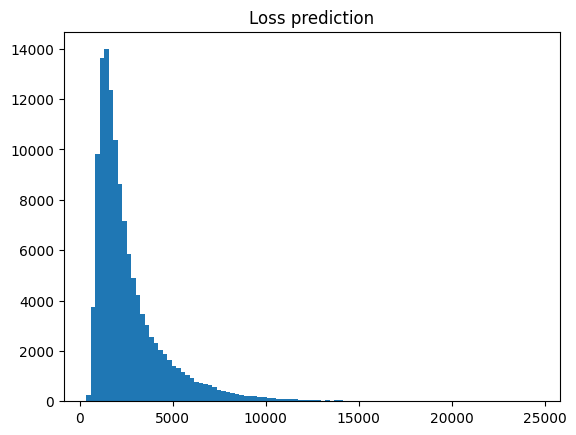

In [6]:
# Get prediction
loss_pred = np.exp(model.predict(test_df.drop(columns=['id'])))    # exponentiate the result since the target of the model is log(loss)

# plot distribution of prediction
plt.hist(loss_pred, bins=100)
plt.title('Loss prediction')
plt.show()

In [7]:
res_df = pd.concat([test_df['id'], pd.Series(loss_pred, name='loss')], axis=1)
res_df.to_csv('../kaggle_result.csv', index=False)

In [ ]:
# Public score: 1133.7